In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustering.kmesar import *
from clustering.utils import load_dataset_3_clusters_separate

In [2]:
points = load_dataset_3_clusters_separate()
df = pd.DataFrame(points, columns=['x', 'y'])

print(df.head())

          x         y
0 -1.423692  0.279919
1 -1.061591  0.223465
2 -0.522010  0.038496
3 -0.998880 -0.427949
4 -1.231561 -0.000117


In [3]:
init_centroids = np.array([
    [-0.1, 3], [0.4, 2], [-0.6, 0]
])

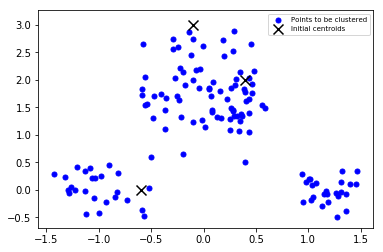

In [4]:
plt.scatter(points[:, 0], points[:, 1], c='blue', s=25, label='Points to be clustered')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='black', s=100, marker='x', label='Initial centroids')
plt.legend(loc='upper right', prop={'size': 7})

Text(0.5, 1.0, 'K-Means standard: k_clusters=3, n_init=1, n_iter=4, SSE= 80.5')

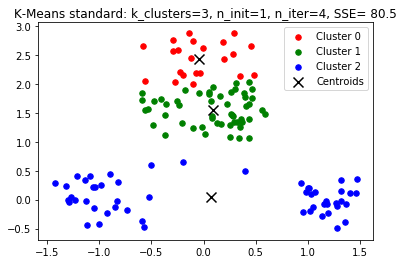

In [5]:
est = KMESAR(k_clusters=3, init_centroids=init_centroids, n_init=1, simulated_annealing_on=False)
est.fit(points)
df['label'] = est.labels_

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'], c=colors[cluster_label],
                s=30, label=f'Cluster {cluster_label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=100, marker='x', label='Centroids')

plt.legend(loc='upper right')
plt.title(f'K-Means standard: k_clusters={est.k_clusters}, n_init={est.n_init}, '
          f'n_iter={est.n_iter_}, SSE={est.inertia_ : .3}')

Text(0.5, 1.0, 'State of K-Means before first iteration with given initial centroids')

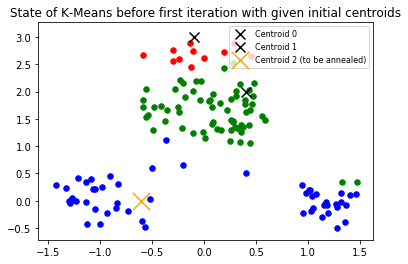

In [6]:
labels = assign_points_to_centroids(points, init_centroids)
df['label_test'] = labels
colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label_test'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'],
                c=colors[cluster_label], s=30, label='_nolegend_')

plt.scatter(init_centroids[0, 0], init_centroids[0, 1], c='black', s=100, marker='x', label='Centroid 0')
plt.scatter(init_centroids[1, 0], init_centroids[1, 1], c='black', s=100, marker='x', label='Centroid 1')
plt.scatter(init_centroids[2, 0], init_centroids[2, 1], c='orange', s=300, marker='x',
            label='Centroid 2 (to be annealed)')

plt.legend(loc='upper right', prop={'size': 8})
plt.title('State of K-Means before first iteration with given initial centroids')

In [7]:
centroid_to_be_annealed = init_centroids[2]
label_j = 2

# points_with_label_j = extract_labeled_points(points, labels, label_j)
# distances = np.linalg.norm(centroid_to_be_annealed - points_with_label_j, ord=2, axis=1)
# print(distances)

"Random annealing"

[0.30657884 0.64124681]
0.4584295167832001


Text(0.5, 1.0, "Annealing centroid with 'max' method")

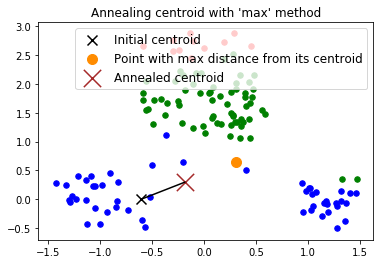

In [14]:
annealing_vector, direction_point = calculate_annealing_vector(points,
                                                               labels,
                                                               centroid_to_be_annealed,
                                                               label_j,
                                                               1,
                                                               annealing_method='random',
                                                               annealing_vector_function='sigmoid',
                                                               beta=6
                                                               )
annealed_centroid = centroid_to_be_annealed + annealing_vector

print(f'{1 - (1 / (1 + np.exp(-1 / 6)))}')

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label_test'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'],
                c=colors[cluster_label], s=30, label='_nolegend_')

plt.scatter(init_centroids[2, 0], init_centroids[2, 1], c='black', s=100, marker='x', label='Initial centroid')
plt.scatter(direction_point[0], direction_point[1], c='darkorange', s=100, label='Point with max distance from its centroid')
plt.scatter(annealed_centroid[0], annealed_centroid[1], c='brown', s=300, marker='x', label='Annealed centroid')

plt.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black')

plt.legend(loc='upper right', prop={'size': 12})
plt.title('Annealing centroid with \'max\' method')

"Max" annealing

[1.45992149 0.11462247]
ln2 / ln(1 + 1.2) = 0.8791181557867741


Text(0.5, 1.0, "Annealing centroid with 'max' method")

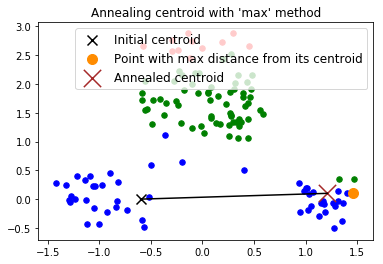

In [15]:

annealing_vector, direction_point  = calculate_annealing_vector(points,
                                                                labels,
                                                                centroid_to_be_annealed,
                                                                label_j,
                                                                1,
                                                                annealing_method='max',
                                                                annealing_vector_function='log',
                                                                beta=1.2
                                                                )
annealed_centroid = centroid_to_be_annealed + annealing_vector

print(f'ln2 / ln(1 + 1.2) = {np.log(2) / np.log(1 + 1.2)}')

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label_test'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'],
                c=colors[cluster_label], s=30, label='_nolegend_')

plt.scatter(init_centroids[2, 0], init_centroids[2, 1], c='black', s=100, marker='x', label='Initial centroid')
plt.scatter(direction_point[0], direction_point[1], c='darkorange', s=100, label='Point with max distance from its centroid')
plt.scatter(annealed_centroid[0], annealed_centroid[1], c='brown', s=300, marker='x', label='Annealed centroid')

plt.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black')

plt.legend(loc='upper right', prop={'size': 12})
plt.title('Annealing centroid with \'max\' method')

"Min" annealing

[-0.52201049  0.03849587]
ln2 / ln(1 + 1.2) = 0.75


Text(0.5, 1.0, "Annealing centroid with 'min' method")

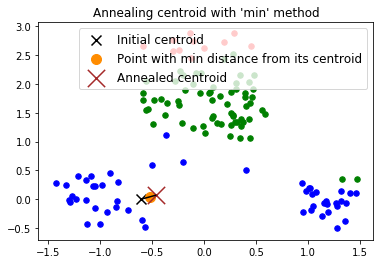

In [16]:
annealing_vector, direction_point  = calculate_annealing_vector(points,
                                              labels,
                                              centroid_to_be_annealed,
                                              label_j,
                                              2,
                                              annealing_method='min',
                                              annealing_vector_function='sq',
                                              beta=1)
annealed_centroid = centroid_to_be_annealed + annealing_vector

print(f'ln2 / ln(1 + 1.2) = {np.min([(1 + 2) / (2 ** 2), 1])}')

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label_test'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'],
                c=colors[cluster_label], s=30, label='_nolegend_')

plt.scatter(init_centroids[2, 0], init_centroids[2, 1], c='black', s=100, marker='x', label='Initial centroid')
plt.scatter(direction_point[0], direction_point[1], c='darkorange', s=100, label='Point with min distance from its centroid')
plt.scatter(annealed_centroid[0], annealed_centroid[1], c='brown', s=300, marker='x', label='Annealed centroid')

plt.plot([centroid_to_be_annealed[0], annealed_centroid[0]],
         [centroid_to_be_annealed[1], annealed_centroid[1]],
         c='black')

plt.legend(loc='upper right', prop={'size': 12})
plt.title('Annealing centroid with \'min\' method')